(how-to-ltr)=
# How to Learn to Rank

Pairwise comparison: $s_{i}$ and $s_{j}$ are some kind of score measure of items $i$ and $j$. The sigmoid function can be used to give us a probability of item $i$ be more relevant than item $j$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Sigmoid function

<img src="../../images/sigmoid.gif"
    alt="../../images/sigmoid.gif"
    style="float: left; margin-right: 3px; width: 300px;" />

In [3]:
def sigmoid(si,sj,a=0.05):
    delta_s = si-sj
    return _sigmoid(delta_s,a)

def _sigmoid(delta_s,a):
    return 1/(1+np.exp(-a*(delta_s)))

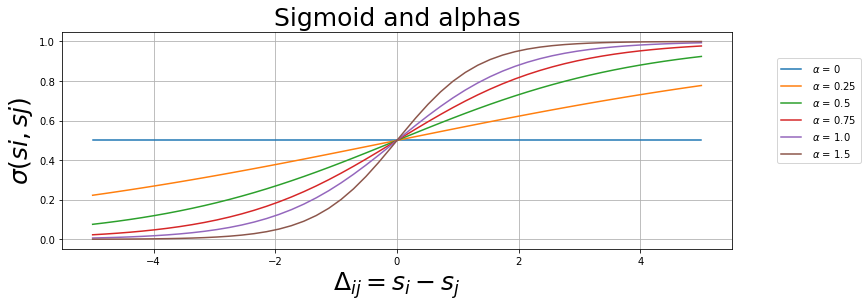

In [4]:
x = np.linspace(-5,5,50)
plt.figure(figsize=(12,4))
plt.title("Sigmoid and alphas",fontsize=25)
for alpha in [0,0.25,0.5,0.75,1.0,1.5]:
    plt.plot(x,_sigmoid(x,alpha),label=f" $ \\alpha $ = {alpha}")
    plt.xlabel("$ \Delta_{ij} = s_{i} - s_{j} $",fontsize=25)
    plt.ylabel("$ \sigma(si,sj) $",fontsize=25)
    plt.legend(bbox_to_anchor=(0.5, 0., 0.7, 0.9))
    plt.grid(True)
plt.show()

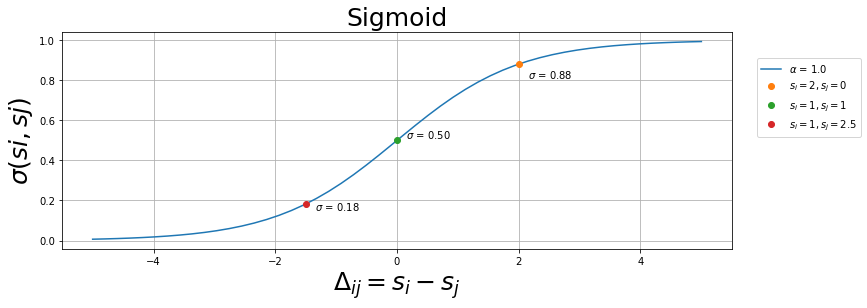

In [5]:
x = np.linspace(-5,5,50)
a = 1.0
plt.figure(figsize=(12,4))
plt.title("Sigmoid",fontsize=25)
plt.plot(x,_sigmoid(x,a),label=f"$\\alpha$ = {a}")
plt.plot(2,_sigmoid(2,a),'o',label="$s_{i} = 2, s_{j} = 0$")
plt.text(x=2.1,y=0.81,s=f" $\sigma$ = {_sigmoid(2,a):.2f}")
plt.plot(0,_sigmoid(0,a),'o',label="$s_{i} = 1, s_{j} = 1$")
plt.text(x=0.1,y=0.51,s=f" $\sigma$ = {_sigmoid(0,a):.2f}")
plt.plot(-1.5,_sigmoid(-1.5,a),'o',label="$s_{i} = 1, s_{j} = 2.5$")
plt.text(x=-1.4,y=0.15,s=f" $\sigma$ = {_sigmoid(-1.5,a):.2f}")
plt.xlabel("$ \Delta_{ij} = s_{i} - s_{j} $",fontsize=25)
plt.ylabel("$ \sigma(si,sj) $",fontsize=25)
plt.legend(bbox_to_anchor=(0.5, 0., 0.7, 0.9))
plt.grid(True)
plt.show()

## Log-Likelihood Error

Using the log-likelihood as a risk of the assumption _"item $i$ is more relevant than item $j$"_.

<img src="../../images/log_sigmoid.gif"
    alt="../../images/log_sigmoid.gif"
    style="float: left; margin-right: 3px; width: 400px;" />

In [6]:
def loss_func_(si,sj,a=0.05):
    delta_s = si-sj
    return _loss_func(delta_s,a)
    
def _loss_func(delta_s,a):
    return np.log(1+np.exp(-a*delta_s))

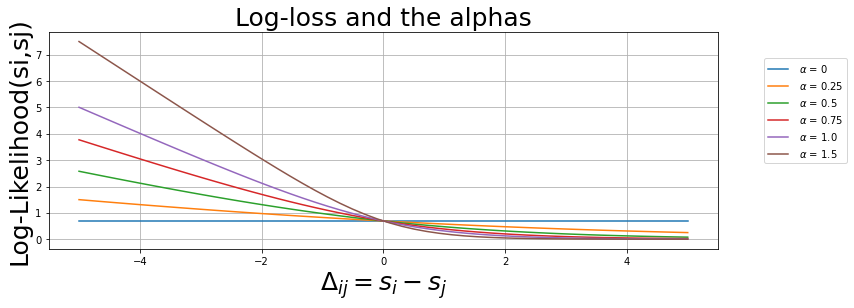

In [9]:
x = np.linspace(-5,5,50)
plt.figure(figsize=(12,4))
plt.title("Log-loss and the alphas", fontsize=25)
for alpha in [0,0.25,0.5,0.75,1.0,1.5]:
    plt.plot(x,_loss_func(x,alpha),label=f" $ \\alpha $ = {alpha}")
    plt.xlabel("$ \Delta_{ij} = s_{i} - s_{j} $",fontsize=25)
    plt.ylabel("Log-Likelihood(si,sj)",fontsize=25)
    plt.legend(bbox_to_anchor=(0.5, 0., 0.7, 0.9))
    plt.grid(True)
plt.show()

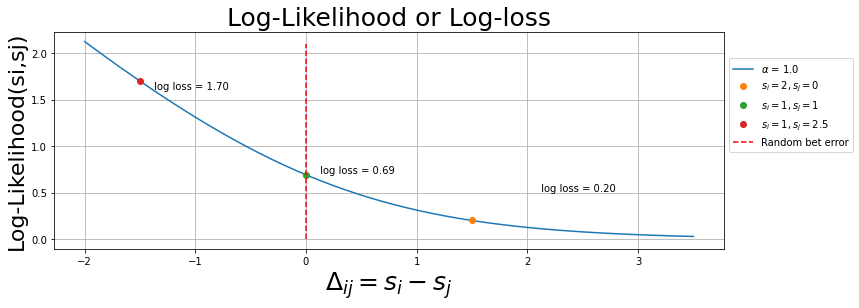

In [8]:
x = np.linspace(-2,3.5,50)
a = 1.0
plt.figure(figsize=(12,4))
plt.title("Log-Likelihood or Log-loss",fontsize=25)
plt.plot(x,_loss_func(x,a),label=f"$\\alpha$ = {a}")
plt.plot(1.5,_loss_func(1.5,a),'o',label="$s_{i} = 2, s_{j} = 0$")
plt.text(x=2.1,y=0.51,s=f" log loss = {_loss_func(1.5,a):.2f}")
plt.plot(0,_loss_func(0,a),'o',label="$s_{i} = 1, s_{j} = 1$")
plt.text(x=0.1,y=0.71,s=f" log loss = {_loss_func(0,a):.2f}")
plt.plot(-1.5,_loss_func(-1.5,a),'o',label="$s_{i} = 1, s_{j} = 2.5$")
plt.text(x=-1.4,y=1.61,s=f" log loss = {_loss_func(-1.5,a):.2f}")
plt.vlines(x=0,ymin=0.0,ymax=2.1,colors="r",linestyles='dashed',label="Random bet error")
plt.xlabel("$ \Delta_{ij} = s_{i} - s_{j} $",fontsize=25)
plt.ylabel("Log-Likelihood(si,sj)",fontsize=22)
plt.legend(bbox_to_anchor=(0.5, 0., 0.7, 0.9))
plt.grid(True)
plt.show()

## Lambdas

This is used to "correct" the predict score of the items.

$$\lambda_{ij} = \frac{-\alpha}{1+e^{\alpha(s_{i}-s_{j})}}$$

If we are making listwise comparisons another expression may be used:

$$\lambda_{ij} = \frac{-\alpha}{1+e^{\alpha(s_{i}-s_{j})}}\Delta_{rel}$$

where $\Delta_{rel}$ is some listwise comparison metric, like nDCG.

In [10]:
def _lambda_ij(delta_s,a):
    return -a*abs(delta_s)/(1+np.exp(a*(delta_s)))

def lambda_ij(si,sj,a=0.05):
    delta_s = si-sj
    return -a*abs(delta_s+0.1)/(1+np.exp(a*(delta_s)))

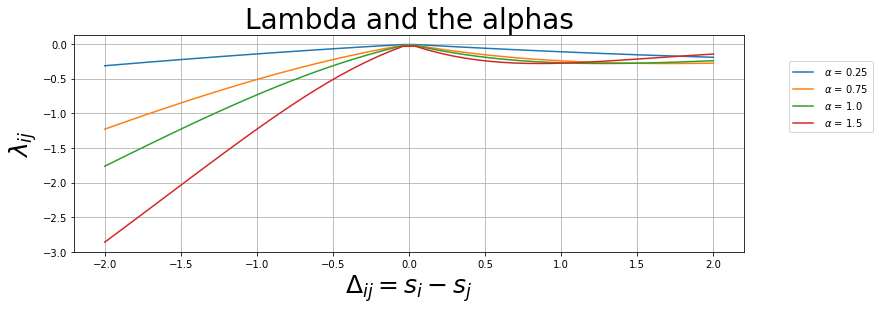

In [11]:
x = np.linspace(-2,2,50)
plt.figure(figsize=(12,4))
plt.title("Lambda and the alphas",fontsize=28)
for alpha in [0.25,0.75,1.0,1.5]:
    plt.plot(x,_lambda_ij(x,alpha),label=f" $ \\alpha $ = {alpha}")
    plt.xlabel("$ \Delta_{ij} = s_{i} - s_{j} $",fontsize=25)
    plt.ylabel("$ \lambda_{ij} $",fontsize=25)
    plt.legend(bbox_to_anchor=(0.5, 0., 0.7, 0.9))
    plt.grid(True)
plt.show()

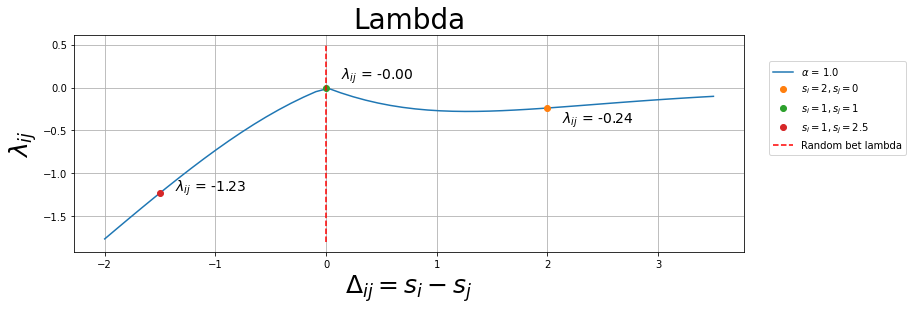

In [13]:
x = np.linspace(-2,3.5,50)
a = 1.0
plt.figure(figsize=(12,4))
plt.title("Lambda",fontsize=28)
plt.plot(x,_lambda_ij(x,a),label=f"$\\alpha$ = {a}")
plt.plot(2,_lambda_ij(2,a),'o',label="$s_{i} = 2, s_{j} = 0$")
plt.text(x=2.1,y=-0.41,s=f" $\lambda_{{ij}}$ = {_lambda_ij(2,a):.2f}",fontsize=14)
plt.plot(0,_lambda_ij(0,a),'o',label="$s_{i} = 1, s_{j} = 1$")
plt.text(x=0.1,y=0.1,s=f" $\lambda_{{ij}}$ = {_lambda_ij(0,a):.2f}",fontsize=14)
plt.plot(-1.5,_lambda_ij(-1.5,a),'o',label="$s_{i} = 1, s_{j} = 2.5$")
plt.text(x=-1.4,y=-1.21,s=f" $\lambda_{{ij}}$ = {_lambda_ij(-1.5,a):.2f}",fontsize=14)
plt.vlines(x=0,ymin=-1.8,ymax=0.5,colors="r",linestyles='dashed',label="Random bet lambda")
plt.xlabel("$ \Delta_{ij} = s_{i} - s_{j} $",fontsize=25)
plt.ylabel("$ \lambda_{ij} $",fontsize=25)
plt.legend(bbox_to_anchor=(0.55, 0., 0.7, 0.9))
plt.grid(True)
plt.show()

## nDCG

DCG stands for `discounted cumulative gain` and nDCG is its normalized form.

In [15]:
def dcg(r,i):
    return (2**r - 1)/(np.log2(1+i))

def dcg_k(x,k):
    result = 0
    for i in range(1,k+1):
        result += dcg(x[i-1],i)
    return result

def max_dcg_k(x,k):
    x = sorted(x)[::-1]
    return dcg_k(x,k)

def ndcg_k(x,k):
    return dcg_k(x,k)/max_dcg_k(x,k)

In [16]:
rel_list1 = [1,0,0,1,0,0,0,1,1,0]
rel_list2 = [1,0,1,0,0,0,0,0,1,1]

In [17]:
dcg_k(rel_list1,5),dcg_k(rel_list2,5),max_dcg_k(rel_list1,5)

(1.4306765580733931, 1.5, 2.5616063116448506)

In [18]:
abs(ndcg_k(rel_list1,5)-ndcg_k(rel_list2,5))

0.02706248872493333

In [19]:
ndcg_k(rel_list1,5),ndcg_k(rel_list2,5),max_dcg_k(rel_list1,5)

(0.5585075862632192, 0.5855700749881525, 2.5616063116448506)

In [20]:
ndcg_k(rel_list1,10),ndcg_k(rel_list2,10),max_dcg_k(rel_list1,10)

(0.7991748853900112, 0.8159313210935148, 2.5616063116448506)